# Netflix and Chill ?… Let’s find a movie first ;) … 

I love to watch movies and going to the cinema, and I might even consider it as a hobby of mine. I like to do with my friends, family, and loved ones.

But as a millennial and specifically I grew up in Lebanon, in my days, to get the information about movies we had to get it from posters, the back of the cassettes or a DVDs, ask for opinions and recommendations and spend some time researching and creating a list of movies that we wanted to watch whenever we had the chance. 

But what if you have a friend who was a huge cinophile or a future movie maker and has a huge list of movies stacked in his notebook … Imagine if you don't know most of the movies and who was casted in them?  Well I remembered how annoying it was in those days. 

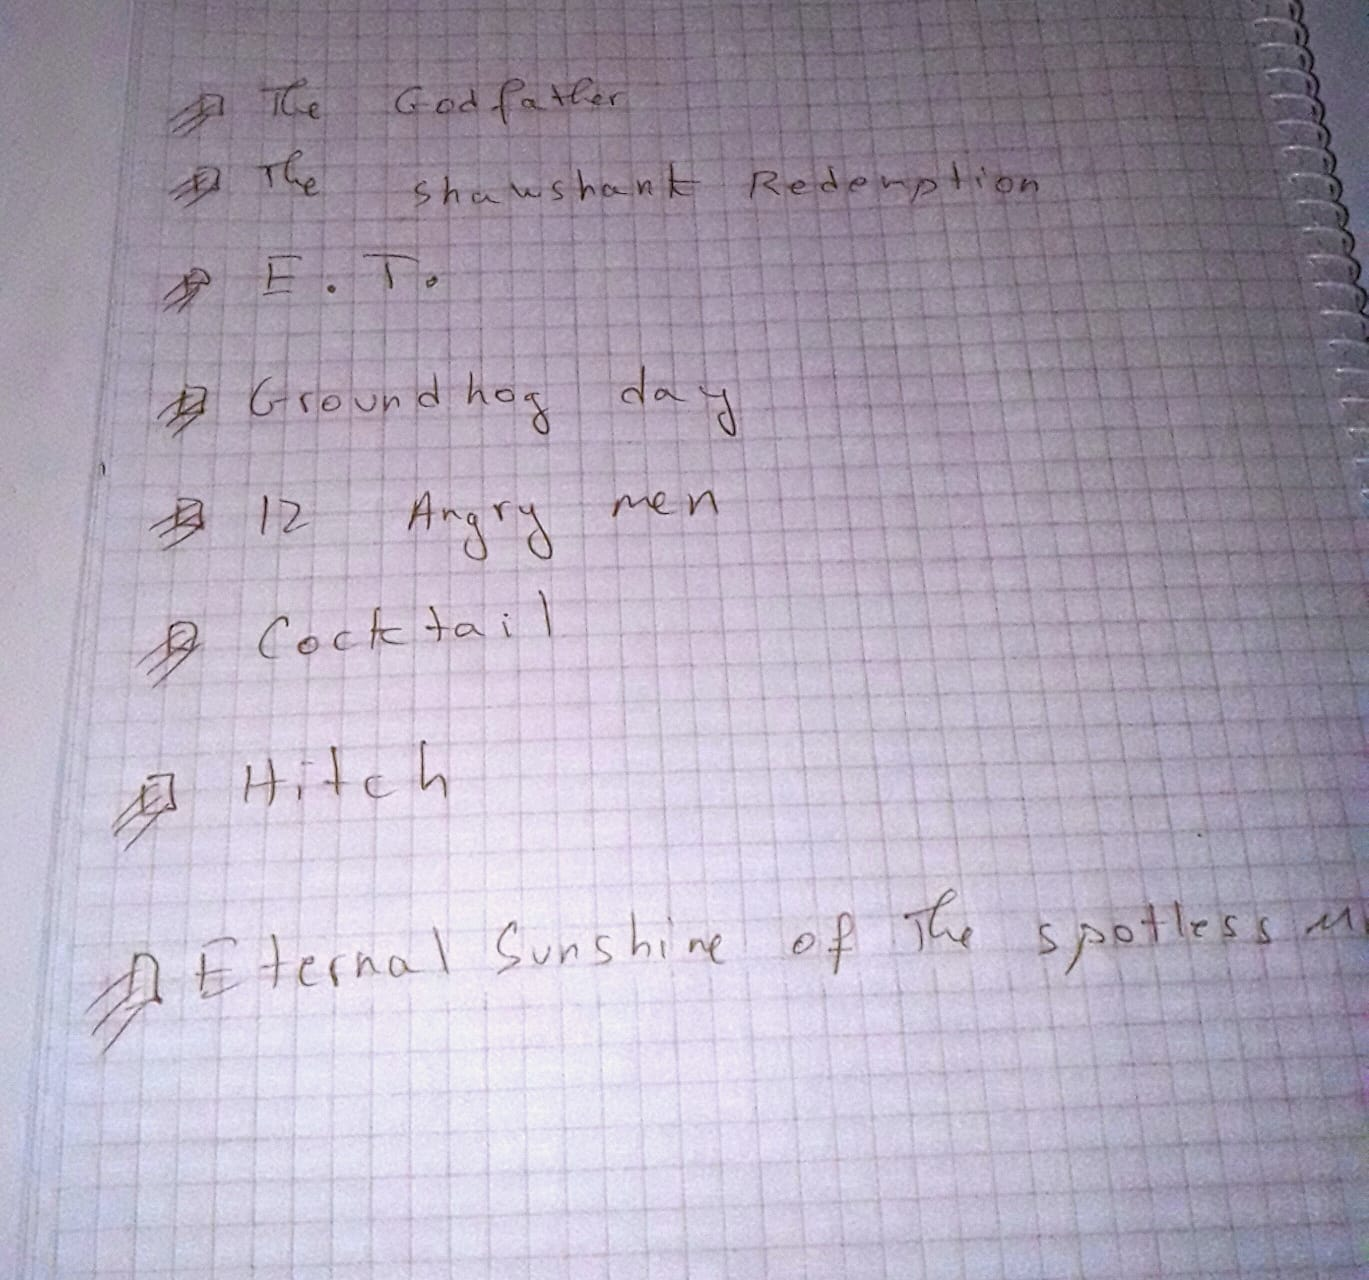

Luckily, in this era of technological advancement where there is an over flooding of data and access to the internet, we can easily compile a database about some movies that we would like to watch,  without suffering through the process of gathering the information … You just tell your friend to send you the excel file and if you know a little bit of programming,  you are in luck.  

One solution is IMDb, according to wikipedia, IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb began as a fan-operated movie database on the Usenet group "rec.arts.movies" in 1990, and moved to the web in 1993. It is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.
IMDb no offers APIs, where you can access it programmatically and do queries and retrieve movie information. So either you can write you own query, or you can use specific libraries.  



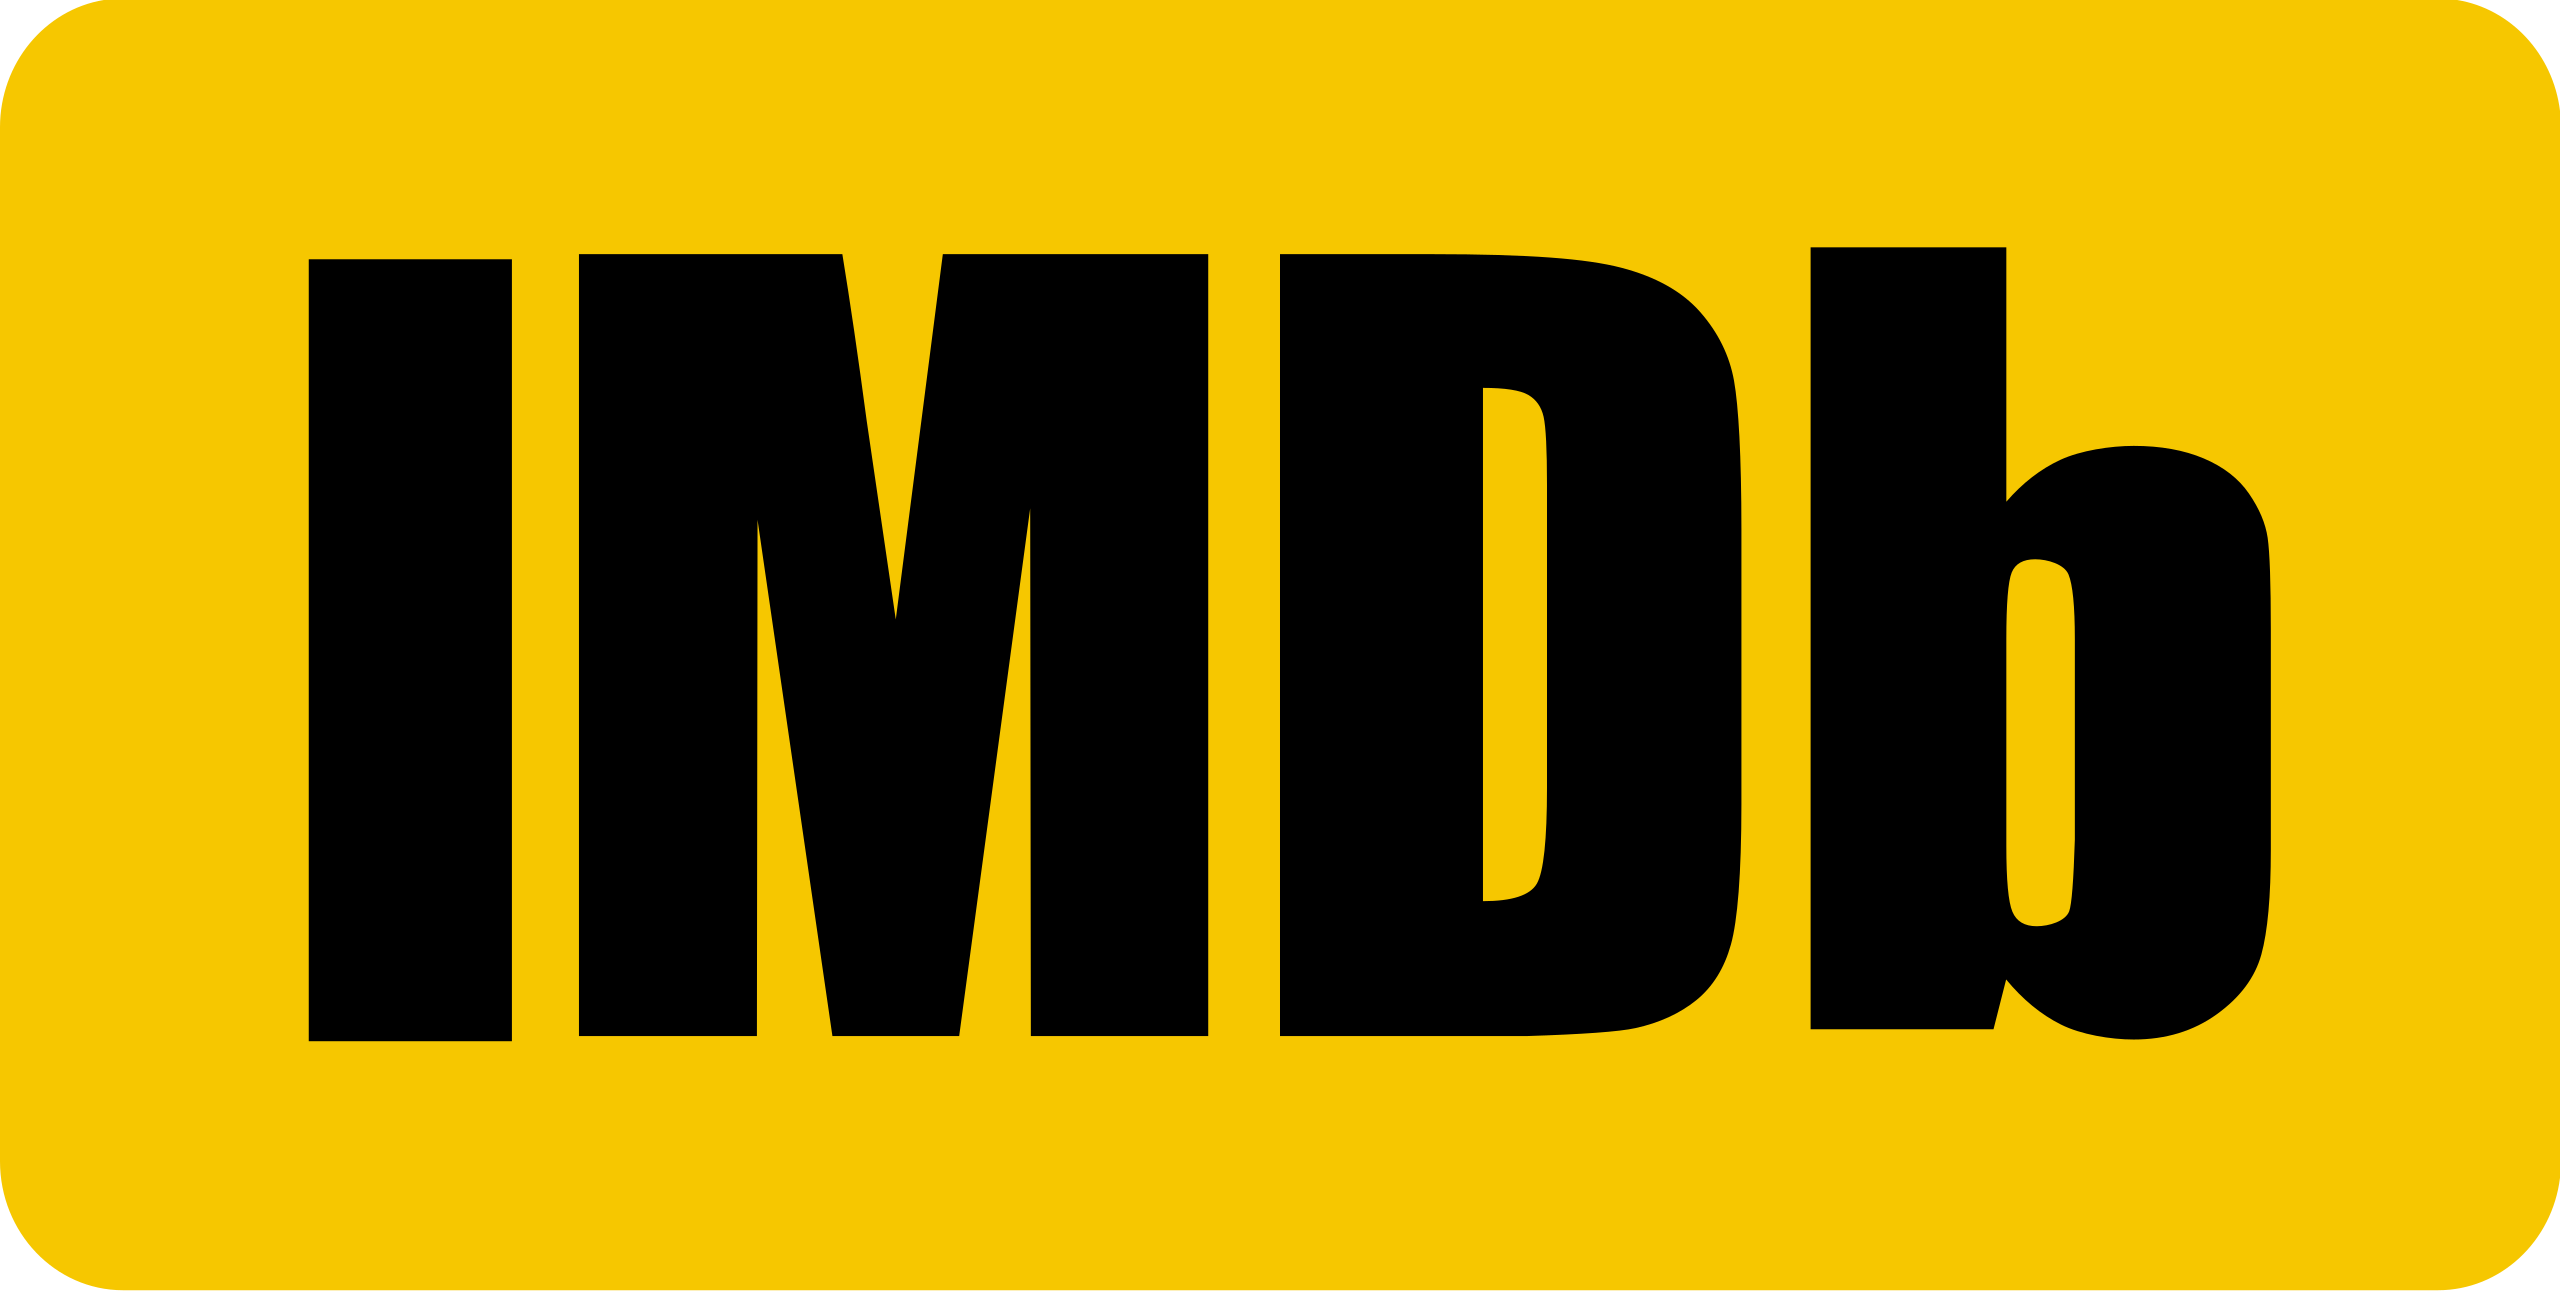


Since I like to code in python and it is one the popular programming languages for data science, I prepared a small project to show you this can be done. If you are familiar to this language, you know that the python community has a wide support for libraries to make the life of a fellow python  developer easier and for this case I used a package called Imdbpy (https://pypi.org/project/IMDbPY/) and I compiled a small database of movies which we will do a query for and select see the most popular ones  … 

    - 12 Angry Men 
    - Begin Again 
    - Birdman 
    - Cadillac records
    - Cocktail
    - Eternal Sunshine of The Spotless Mind
    - Hitch
    - Nice Guys
    - Punch Drunk Love
    - Rebel without a Cause 
    - The Expandables 4
    - The Pianist
    - The Promise
    
For this study case, we assume that you received a list of titles thinking that they are movies and you have never heard of these movies before … They are too many to individually search for the info, but instead you want to use my code :D … So let’s go.     

## 1 - Import packages

In [1]:
from tqdm import tqdm #progress bar
import pandas as pd #pandas 
import difflib #compares string values 
import imdb # importing the module

## 2 - User preferences

In [14]:
#select number of main actors to retrieve
ranks = 3 
    
# movie names
names = pd.read_csv('movies_list.csv',index_col = 0,header=0)
print(names)

                                   movies
0                           12 Angry Men 
1                            Begin Again 
2                                Birdman 
3                        cadillac records
4                                Cocktail
5   Eternal Sunshine of The Spotless Mind
6                                   Hitch
7                               Nice Guys
8                        Drunk Punch Love
9                  Rebel without a Cause 
10                      The Expandables 4
11                            The Pianist
12                            The Promise
13                           The notebook
14               The shawshank redemption


You can either assign a list or import a csv file ... 

## 2 - Functions
This function takes a list of IMdb objects which includes names of the casr and returns there values as list of strings

In [15]:
def main_actors(cast):
    actors = [] 
    for i in range(len(cast)):
        actors.append(cast[i].data['name'])        
    return actors


## 3 - extracting the metadata

In [16]:
#%% _______ RUN query _____________

# creating instance of IMDb
ia = imdb.IMDb()

# dataframe for matadata
df_movies = pd.DataFrame()

for idx,name in enumerate(tqdm(names.movies,total=len(names))):
    
    #search for movie based on name
    movie_results = ia.search_movie(name)    
    
    #generate metadata and append to dataframe for each movie
    df_movie = pd.DataFrame()
    for item in movie_results:
        df_movie  = df_movie.append(pd.DataFrame(data = [[item]+item.values()], columns = ['data']+item.keys()))

    #remove outliers by title by cross matching names 
    nearest = difflib.get_close_matches(name, df_movie['title'])
    df_movie = df_movie.query("title in @nearest")

    #craete common index and append
    df_movie['searcher'] = df_movie.shape[0]*[name]
    df_movies = df_movies.append(df_movie)
    
#reindex and filter out non-movies    
df_movies.index = range(df_movies.shape[0])




100%|██████████| 15/15 [00:12<00:00,  1.19it/s]


#### The dataframe contains columns which has IMdb class objects and they are not printable
The searcher column is the names that we passed for querying

In [17]:
try: 
    print(df_movies)
except:
    print("The dataframe contains non-printable columns")
df_movies[['title','kind', 'year','searcher','kind']]

The dataframe contains non-printable columns


,title,kind,year,searcher,kind
0,12 Angry Men,movie,1957.0,12 Angry Men,movie
1,12 Angry Men,tv movie,1997.0,12 Angry Men,tv movie
2,12 Angry Men,episode,2013.0,12 Angry Men,episode
3,12 Angry Men,episode,2020.0,12 Angry Men,episode
4,12 Angry Men,episode,2018.0,12 Angry Men,episode
...,...,...,...,...,...
91,The Shawshank Redemption,episode,2015.0,The shawshank redemption,episode
92,The Shawshank Redemption,episode,2020.0,The shawshank redemption,episode
93,The Shawshank Redemption,episode,2017.0,The shawshank redemption,episode
94,The Shawshank Redemption,episode,2011.0,The shawshank redemption,episode


#### Let's filter based on movies and remove all the unwanted stuff 

In [26]:
df_movies = df_movies[df_movies['kind'].str.contains('movie')]
df_movies[['searcher','title','kind', 'year']].sample(5)

,searcher,title,kind,year
40,Hitch,Hitch,movie,2012.0
5,Begin Again,Begin Again,movie,2013.0
26,Cocktail,Cocktail,movie,2010.0
24,Cocktail,Cocktail,movie,1988.0
44,Nice Guys,Nice Guys,movie,2000.0


## 4 - Extracting all the data for each retrieved movie

In [21]:

#dataframe which will include all the neccessary information
data = pd.DataFrame() 

for movie in tqdm(df_movies.itertuples(),total=len(df_movies)):    
    
    #extract details of movies based on filtered meta-data    
    movie_data_json = ia.get_movie(movie.data.getID()).data    

    #get cast name list and sort alphabetically 
    try:
        all_actors = main_actors(movie_data_json['cast'])
        movie_data_json['main_actors'] = all_actors[0 : ranks+1] 
        movie_data_json['all_actors_sorted'] = sorted(all_actors)
        
    except: 
        movie_data_json['main_actors'] = ''    
        
    #here we convert the data into a pandas dataframe    
    movie_data = pd.json_normalize(movie_data_json)
    movie_data['searcher'] = [movie.searcher] 

    #append the results    
    data = data.append(movie_data)  
    


100%|██████████| 41/41 [01:33<00:00,  2.28s/it]


In [23]:
#clean up the index values
data.index = range(data.shape[0])

#sometimes votes are notes added and we can use them
data.votes.fillna(1,inplace=True)


#filter coloumns for visualization
select = ['searcher','year','title','localized title','all_actors_sorted','main_actors','genres', 'runtimes','rating', 'votes','kind','imdbID']
data_Clean = data[select]

#show data
data_Clean.head(10)

,searcher,year,title,localized title,all_actors_sorted,main_actors,genres,runtimes,rating,votes,kind,imdbID
0,12 Angry Men,1957.0,12 Angry Men,Dwunastu gniewnych ludzi,"[Billy Nelson, E.G. Marshall, Ed Begley, Edwar...","[Martin Balsam, John Fiedler, Lee J. Cobb, E.G...","[Crime, Drama]",[96],9.0,737620.0,movie,0050083
1,12 Angry Men,1997.0,12 Angry Men,Dwunastu gniewnych ludzi,"[Armin Mueller-Stahl, Courtney B. Vance, Doria...","[Courtney B. Vance, Ossie Davis, George C. Sco...","[Crime, Drama]",[117],7.8,14171.0,tv movie,0118528
2,Begin Again,2013.0,Begin Again,Zacznijmy od nowa,"[Adam Levine, Alexis Sykes, Alix Cross, Andrew...","[James Corden, Keira Knightley, Mark Ruffalo, ...","[Comedy, Drama, Music, Romance]",[104],7.4,150782.0,movie,1980929
3,Begin Again,2013.0,Begin Again,Begin Again,"[Bill Gillane, Carter Blanc, David Harris, Dus...","[Lisa Spurrier, Bill Gillane, Dusti Jones, Sav...","[Drama, Family]",[68],7.0,63.0,movie,1945037
4,Begin Again,NaN,Begin Again - IMDb,NaN,"[Emily Ana Collins, Rodney Daniels, Tina Atrin]","[Emily Ana Collins, Tina Atrin, Rodney Daniels]",[Drama],NaN,NaN,1.0,NaN,13491618
5,Birdman,2014.0,Birdman,Birdman,[Caroline Christl Long],[Caroline Christl Long],"[Documentary, Short]",[13],5.2,186.0,video movie,5130912
6,cadillac records,2008.0,Cadillac Records,Cadillac Records,"[Aaron Munoz, Adaku Ononogbo, Adrien Brody, Al...","[Josh Alscher, Tim Bellow, Tony Bentley, Tammy...","[Biography, Drama, Music]",[109],7.0,20947.0,movie,1042877
7,Cocktail,1988.0,Cocktail,Koktajl,"[Adam Furfaro, Allan Wasserman, Andrea Doven, ...","[Tom Cruise, Bryan Brown, Elisabeth Shue, Lisa...","[Comedy, Drama, Romance]",[104],5.9,82692.0,movie,0094889
8,Cocktail,2012.0,Cocktail,Cocktail,"[Alexandros Panagakis, Aloy Nonso, Amanda Smit...","[Saif Ali Khan, Deepika Padukone, Diana Penty,...","[Comedy, Drama, Romance]",[146],6.3,13829.0,movie,2168910
9,Cocktail,2010.0,Cocktail,Cocktail,"[Anoop Menon, Aparna Nair, Esther Anil, Fahadh...","[Jayasurya, Anoop Menon, Samvrutha Sunil, Inno...","[Drama, Musical, Thriller]",[111],7.2,827.0,movie,1821373



# 5 - The must watch

Now we have all all the information. But some of the information might be missing, which is fine. Say that you want the most popular ones since the list you got is a "must-watch list". So you can use the votes to filter those one out :D ...   

In [30]:
#get populat ones
idx = data_Clean.groupby(['searcher'])['votes'].transform(max) == data_Clean['votes']
data_pop = data_Clean[idx]
data_pop = pd.merge(names,data_pop,left_on='movies',right_on='searcher',how='outer')
data_pop

,movies,searcher,year,title,localized title,all_actors_sorted,main_actors,genres,runtimes,rating,votes,kind,imdbID
0,12 Angry Men,12 Angry Men,1957.0,12 Angry Men,Dwunastu gniewnych ludzi,"[Billy Nelson, E.G. Marshall, Ed Begley, Edwar...","[Martin Balsam, John Fiedler, Lee J. Cobb, E.G...","[Crime, Drama]",[96],9.0,737620.0,movie,0050083
1,Begin Again,Begin Again,2013.0,Begin Again,Zacznijmy od nowa,"[Adam Levine, Alexis Sykes, Alix Cross, Andrew...","[James Corden, Keira Knightley, Mark Ruffalo, ...","[Comedy, Drama, Music, Romance]",[104],7.4,150782.0,movie,1980929
2,Birdman,Birdman,2014.0,Birdman,Birdman,[Caroline Christl Long],[Caroline Christl Long],"[Documentary, Short]",[13],5.2,186.0,video movie,5130912
3,cadillac records,cadillac records,2008.0,Cadillac Records,Cadillac Records,"[Aaron Munoz, Adaku Ononogbo, Adrien Brody, Al...","[Josh Alscher, Tim Bellow, Tony Bentley, Tammy...","[Biography, Drama, Music]",[109],7.0,20947.0,movie,1042877
4,Cocktail,Cocktail,1988.0,Cocktail,Koktajl,"[Adam Furfaro, Allan Wasserman, Andrea Doven, ...","[Tom Cruise, Bryan Brown, Elisabeth Shue, Lisa...","[Comedy, Drama, Romance]",[104],5.9,82692.0,movie,0094889
5,Eternal Sunshine of The Spotless Mind,Eternal Sunshine of The Spotless Mind,2004.0,Eternal Sunshine of the Spotless Mind,Zakochany bez pamięci,"[Amir Ali Said, Brian Price, David Cross, Debb...","[Jim Carrey, Kate Winslet, Gerry Robert Byrne,...","[Drama, Romance, Sci-Fi]",[108],8.3,956200.0,movie,0338013
6,Hitch,Hitch,2005.0,Hitch,Hitch: Najlepszy doradca przeciętnego faceta,"[Adam Arkin, Adam Bertocci, Adam LeFevre, Adam...","[Will Smith, Eva Mendes, Kevin James, Amber Va...","[Comedy, Romance]",[118],6.6,306681.0,movie,0386588
7,Nice Guys,Nice Guys,2010.0,Nice Guys,Nice Guys,"[Adam Schutz, Caleb Noel, Emily Seipelt, Holly...","[Caleb Noel, Megan Freado, Michael John Lea, E...","[Comedy, Drama, Romance]",[67],7.2,15.0,movie,2014304
8,Drunk Punch Love,Drunk Punch Love,2002.0,Punch-Drunk Love,Lewy sercowy,"[Adam Sandler, Alan Parry, Andrew Higgs, Anica...","[Adam Sandler, Jason Andrews, Don McManus, Emi...","[Comedy, Drama, Romance, Thriller]",[95],7.3,156558.0,movie,0272338
9,Rebel without a Cause,Rebel without a Cause,1955.0,Rebel Without a Cause,Buntownik bez powodu,"[Almira Sessions, Ann Doran, Bert Stevens, Bev...","[James Dean, Natalie Wood, Sal Mineo, Jim Backus]",[Drama],[111],7.7,87488.0,movie,0048545
